## Apa itu Waffle Chart ?

__Waffle Chart__ adalah sebuah visualisasi data yang umumnya berbentuk persegi dan biasanya terdiri dari kotak-kotak kecil yang disusun dalam tata letak tertentu. Kotak diberi warna sesuai dengan proporsi masing-masing kategori. Dinamakan <i>waffle chart</i> karena memang bentuknya menyerupai jenis makanan <i>waffle</i>. 

 <i>import</i> terlebih dahulu <i>library</i> yang dibutuhkan seperti Pandas, Numpy, dan tentunya Matplotlib. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches # Diperlukan untuk membuat waffle Charts

## Load dataset

Dataset yang akan digunakan pada praktek kali ini adalah dataset <a href='https://www.kaggle.com/imdevskp/world-population-19602018'>Populasi penduduk dunia</a> berdasarkan negara.

<i>load</i> dataset ke dalam dataframe Pandas dan disimpan pada variabel <code>df</code>.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset

df = pd.read_csv("pop_worldometer_data.csv")
df.head(10)

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
5,Brazil,212559417,0.72,1509890,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73
6,Nigeria,206139589,2.58,5175990,226.0,910770.0,-60000.0,5.4,18.0,52.0,2.64
7,Bangladesh,164689383,1.01,1643222,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11
8,Russia,145934462,0.04,62206,9.0,16376870.0,182456.0,1.8,40.0,74.0,1.87
9,Mexico,128932753,1.06,1357224,66.0,1943950.0,-60000.0,2.1,29.0,84.0,1.65


Untuk memudahkan proses visualisasi, kolom <code>Country (or dependency)</code> menjadi indeks.

In [5]:
# Menjadikan kolom 'Country (or dependency)' sebagai indeks

df.set_index('Country (or dependency)', inplace=True)

lihat data teratas dari dataframe <code>df</code> setelah perubahan indeks.

In [6]:
# Menampilkan 10 data teratas

df.head(10)

,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
Country (or dependency),,,,,,,,,,
China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
Brazil,212559417,0.72,1509890,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73
Nigeria,206139589,2.58,5175990,226.0,910770.0,-60000.0,5.4,18.0,52.0,2.64
Bangladesh,164689383,1.01,1643222,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11
Russia,145934462,0.04,62206,9.0,16376870.0,182456.0,1.8,40.0,74.0,1.87


Membuat <i>waffle chart</i> untuk 5 negara dengan populasi terbanyak. Karena dataframe <code>df</code> sudah terurut berdasarkan populasi terbanyak, sekarang kita buat dataframe baru yang menampung 5 data teratas dari dataframe <code>df</code> dan disimpan pada variabel <code>df_top5</code>.

In [7]:
# Mengambil 5 data teratas dan menyimpannya pada dataframe baru

df_top5 = df.head(5)
df_top5

,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
Country (or dependency),,,,,,,,,,
China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83


Dataframe <code>df_top5</code> ini nantinya akan digunakan untuk membuat <i>waffle chart</i>.

## Waffle Chart dengan Matplotlib

Secara umum, langkah-langkah dalam membuat <i>waffle chart</i> dengan Matplotlib adalah sebagai berikut.

1. Menentukan proporsi dari masing-masing kategori dengan membagi nilai dari tiap kategori tersebut dengan total nilai dari keseluruhan kategori.
2. Mendefinisikan keseluruhan ukuran <i>waffle chart</i>.
3. Menggunakan proporsi dari tiap kategori untuk menentukan jumlah kotak yang mewakili tiap kategori.
4. Membuat matriks yang menyerupai <i>waffle chart</i> dan mengisinya.
5. Memetakan matriks <i>waffle chart</i> ke dalam bentuk visual.

__Langkah 1 -__ Menentukan proporsi dari masing-masing kategori.

In [8]:
# Menghitung proporsi dari tiap kategori
total = sum(df_top5['Population (2020)'])
category_proportions = [(float(value) / total) for value in df_top5['Population (2020)']]

# Menampilkan proporsi tiap kategori (negara)
for i, prop in enumerate(category_proportions):
    print (df_top5.index.values[i] + ': ' + str(prop))

China: 0.39490364297235137
India: 0.3786283309158087
United States: 0.0908163645268692
Indonesia: 0.07504598604120252
Pakistan: 0.06060567554376817


Setelah mendapatkan proporsi dari masing-masing kategori atau dalam hal ini proporsi dari tiap negara, harus menentukan ukuran <i>waffle chart</i>

__Langkah 2 -__ Mendefinisikan keseluruhan ukuran <i>waffle chart</i>.

In [9]:
width = 45       # lebar chart
height = 15      # tinggi chart

total_num_tiles = width * height   # jumlah total blok persegi

print ('Total jumlah kotak : ', total_num_tiles)

Total jumlah kotak :  675


__Langkah 3 -__ Menggunakan proporsi dari tiap kategori untuk menentukan jumlah kotak yang mewakili tiap kategori.

In [10]:
# Menghitung jumlah blok persegi untuk tiap kategori/negara
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# Menampilkan jumlah blok persegi per kategori/negara
for i, tiles in enumerate(tiles_per_category):
    print (df_top5.index.values[i] + ': ' + str(tiles))

China: 267
India: 256
United States: 61
Indonesia: 51
Pakistan: 41


__Langkah 4 -__ Membuat matriks yang menyerupai <i>waffle chart</i> dan mengisinya.

In [11]:
# Menginisialisasi waffle chart sebagai matriks kosong
waffle_chart = np.zeros((height, width))

# Menentukan indeks awal untuk perulangan waffle chart
category_index = 0
tile_index = 0

# Mengisi waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # Jika jumlah blok persegi yang terisi untuk kategori yang sedang diproses sama dengan blok persegi yang dialokasikan..
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...lanjutkan proses ke kategori selanjutnya
            category_index += 1       
            
        waffle_chart[row, col] = category_index

Tampilkan array <code>waffle_chart</code> yang terbentuk.

In [12]:
# Menampilkan array yang terbentuk

waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 

__Langkah 5 -__ Memetakan matriks <i>waffle chart</i> ke dalam bentuk visual.

Di Matplotlib, gunakan <i>method</i> <code>matshow()</code> untuk menampilkan <i>waffle chart</i>.

<Figure size 432x288 with 0 Axes>

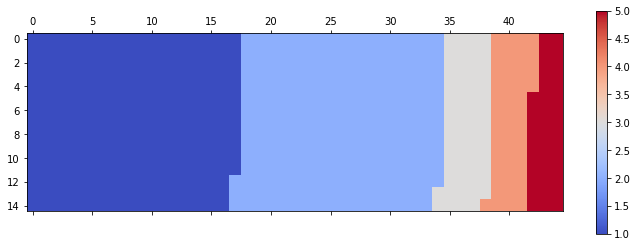

In [13]:
# Membuat objek figure
fig = plt.figure()

# Menampilkan waffle chart dengan matshow()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

Setelah <i>waffle chart</i> terbentuk, sekarang saatnya mempercantik tampilannya dengan mengaplikasikan beberapa pengaturan seperti menambahkan <i>grid lines</i> dan menambahkan legend.

### Menambahkan grid lines

Untuk menambahkan <i>grid lines</i> pada <i>waffle chart</i>, harus mendapatkan <i>axes</i> saat ini atau yang sedang kita kerjakan untuk membuat <i>waffle chart</i> tersebut dengan menggunakan <i>method</i> <code>gca()</code> <i>(get current axes)</i>. Kemudian pada <i>axes</i> tersebut kita atur <i>minor ticks</i>-nya, baru setelah itu tambahkan <i>gridlines</i> berdasarkan <i>minor ticks</i>.

<Figure size 432x288 with 0 Axes>

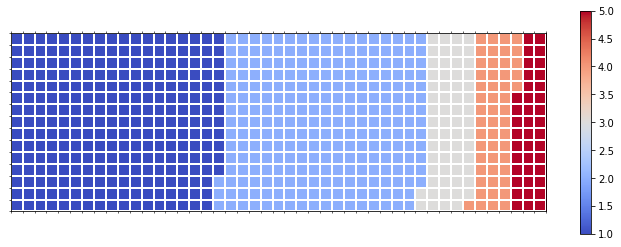

In [14]:
# Membuat objek figure
fig = plt.figure()

# Menampilkan waffle chart dengan matshow()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Mendapatkan axes (get current axes)
ax = plt.gca()

# Mengatur minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# Menambahkan gridlines berdasarkan minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.show()

### Menambahkan legend

Untuk menambahkan legend, perlu menghitung jumlah kumulatif dari kategori individu untuk menyesuaikan skema warna antara chart dan legend. Setelah itu, buat legend dan menambahkannya ke <i>chart</i>. Perhatikan kode berikut.

<Figure size 432x288 with 0 Axes>

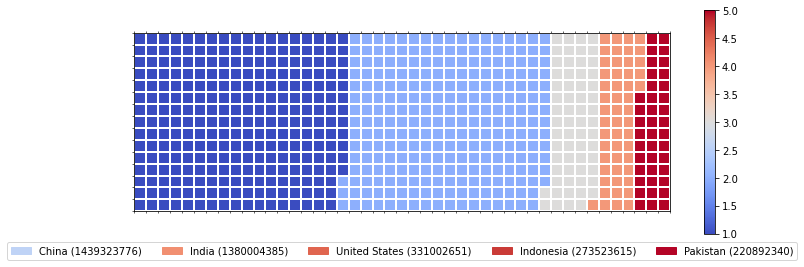

In [15]:
# Membuat objek figure
fig = plt.figure()

# Menampilkan waffle chart dengan matshow()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Menadapatkan axis
ax = plt.gca()

# Mengatur minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# Menambahkan gridlines berdasarkan minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Menghitung jumlah kumulatif kategori individu untuk menyesuaikan skema warna antara chart dan legend
values_cumsum = np.cumsum(df_top5['Population (2020)'])
total_values = values_cumsum[len(values_cumsum) - 1]

# Membuat legend
legend_handles = []
for i, category in enumerate(df_top5.index.values):
    label_str = category + ' (' + str(df_top5['Population (2020)'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# Menambahkan legend ke chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_top5.index.values),
           bbox_to_anchor=(0., -0.3, 1, .1)
          )
plt.show()

Pembuatan <i>waffle chart</i> dengan menggunakan Matplotlib terbilang rumit, dan hasilnya juga terkadang kurang memuaskan. Ada satu <i>package</i> dari Python yang khusus digunakan untuk membuat <i>waffle chart</i>, yaitu __PyWaffle__. Untuk lebih jelasnya langsung saja lihat pembahasan berikut.

## Waffle Chart dengan PyWaffle

__PyWaffle__ adalah <i>package</i> Python yang dikhususkan untuk membuat <i>waffle chart</i>. Dengan menggunakan PyWaffle, sangat mudah men-<i>generate</i>- <i>waffle chart</i> serta melakukan modifikasi-modifikasi untuk memperindah tampilan sesuai yang dinginkan. Untuk lebih detailnya silahkan lihat dokumentasi <a href='https://pywaffle.readthedocs.io/en/latest/'>PyWaffle</a>

install terlebih dahulu PyWaffle dengan menjalankan kode di bawah ini.

In [16]:
pip install pywaffle

     |████████████████████████████████| 565 kB 4.3 MB/s 


Selanjutnya, dari <i>package</i> PyWaffle <i>import</i> __Waffle__.

In [17]:
# Import Waffle

from pywaffle import Waffle

Membuat visualisasi data jenis <i>waffle chart</i> dengan mendefinisikan <code>FigureClass = Waffle</code> seperti di bawah ini.

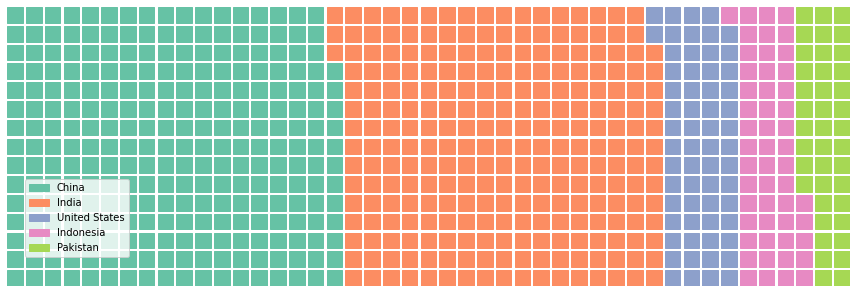

In [18]:
# Membuat waffle chart dengan PyWaffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    columns=45,
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.15, 0.4)}    
)

Dari kode di atas, harus menentukan 

* <code>rows</code> : Jumlah baris yang diinginkan.
* <code>columns</code> : Jumlah kolom yang diinginkan.
* <code>values</code> : Nilai dari <i>waffle chart</i>, dalam hal ini nilainya adalah <code>tiles_per_category</code> yang sudah dibuat sebelumnya.
* <code>labels</code> : Label yang akan ditampilkan pada legend, dalam hal ini adalah nama negara yang merupakan indeks dari <code>df_top5</code>.
* <code>figsize</code> : Ukuran <i>figure</i>.
* <code>legend</code> : Untuk menampilkan legend, dimana <code>bbox_to_anchor</code> adalah untuk mengatur posisinya.

### Mengatur legend dan warna 

<i>Default</i>-nya legend akan ditampilkan seperti output di atas. Namun, juga dapat mengaturnya menjadi berbentuk memanjang dengan mendefinisikan <code>ncol</code>. Selain itu juga dapat mengatur ukuran huruf dengan <code>fontsize</code> dan lokasinya dengan <code>loc</code>. Perhatikan kode berikut.

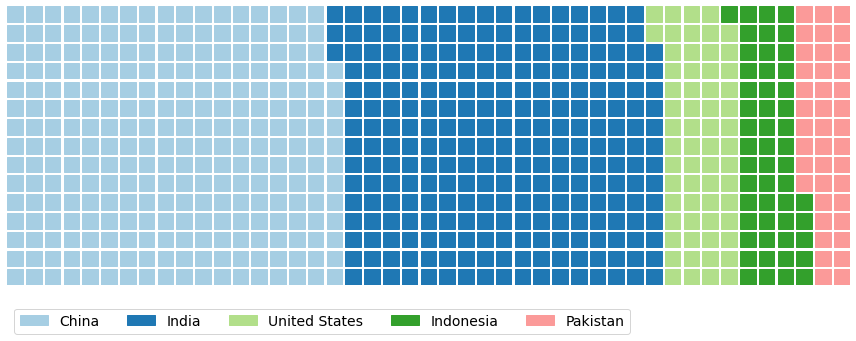

In [19]:
# Membuat waffle chart dengan PyWaffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14}    
)

### Menambahkan judul

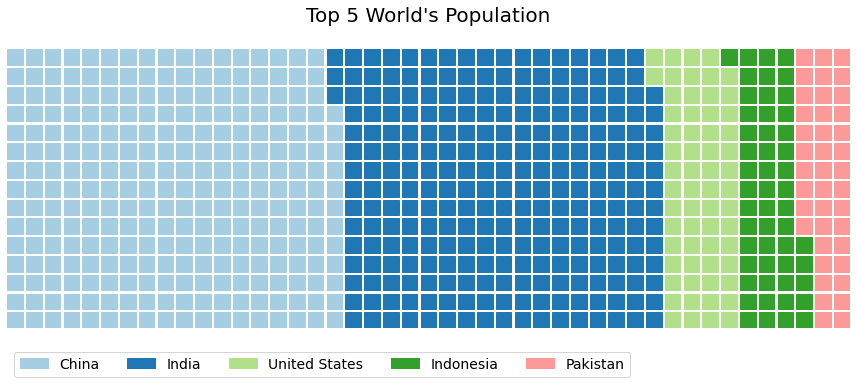

In [20]:
# Membuat waffle chart dengan PyWaffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14},
    title={'label': "Top 5 World's Population\n",
          'loc': 'center',
          'fontdict': {'fontsize': 20}}
)

### Mengatur jarak blok

PyWaffle membuat modifikasi <i>waffle chart</i> menjadi lebih mudah. Dengan membuat <i>waffle chart</i> dengan PyWaffle, atur jarak antar blok atau kotaknya dengan menambahkan parameter berikut:

* <code>interval_ratio_x</code> : Untuk mengatur jarak antar kotak di sumbu X, atau jarak kanan dan kirinya.
* <code>interval_ratio_y</code> : Untuk mengatur jarak antar kotak di sumbu Y, atau jarak atas dan bawahnya.

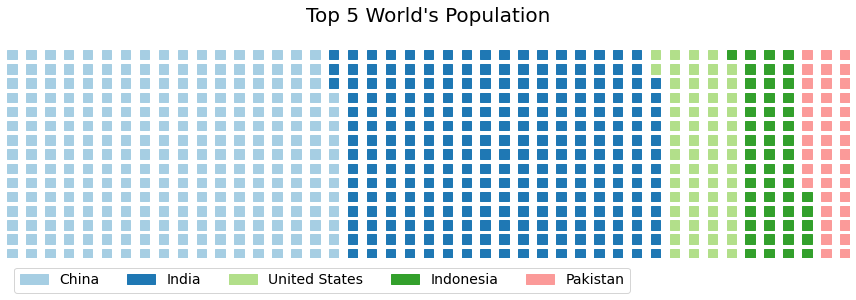

In [21]:
# Membuat waffle chart dengan PyWaffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14},
    title={'label': "Top 5 World's Population\n",
          'loc': 'center',
          'fontdict': {'fontsize': 20}},
    interval_ratio_x=1,
    interval_ratio_y=0.5
)

### Mengganti blok persegi dengan karakter dan icon

Selanjutnya, yang menarik dari PyWaffle adalah dapat mengganti blok atau kotak-kotak tersebut dengan karakter atau <i>icon</i> seperti bentuk bulat, bintang, matahari, bulan, dan sebagainya. 

Misal menggunakan karakter berbentuk bulat dengan menambahkan parameter <code>characters</code> dan diberikan nilai berupa bentuk bulat atau yang diinginkan.

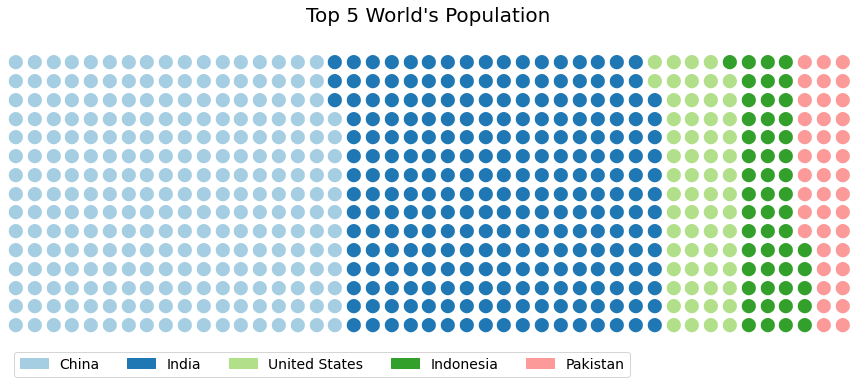

In [22]:
# Membuat waffle chart dengan PyWaffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14},
    title={'label': "Top 5 World's Population\n",
          'loc': 'center',
          'fontdict': {'fontsize': 20}},
    characters='⬤',
    font_size=14
)

Menggunakan parameter <code>icons</code> dan diberikan nilai berupa nama <i>icon</i> yang diinginkan. 

Beri parameter <code>icons = 'star'</code> untuk mengganti kotak dengan <i>icon</i> bintang.

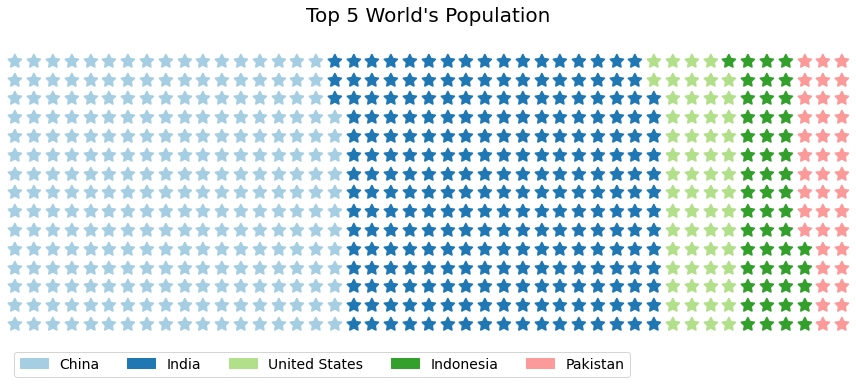

In [23]:
# Membuat waffle chart dengan PyWaffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14},
    title={'label': "Top 5 World's Population\n",
          'loc': 'center',
          'fontdict': {'fontsize': 20}},
    icons='star',
    font_size=14
)

Jika ingin <i>icon</i> untuk tiap kategori adalah bentuk yang berbeda, maka hanya perlu mendefinisikannya dalam bentuk list. berikan parameter <code>icon_legend = True</code> agar legend menampilkan <i>icon</i> yang sesuai untuk tiap kategori. Perhatikan kode di bawah ini.

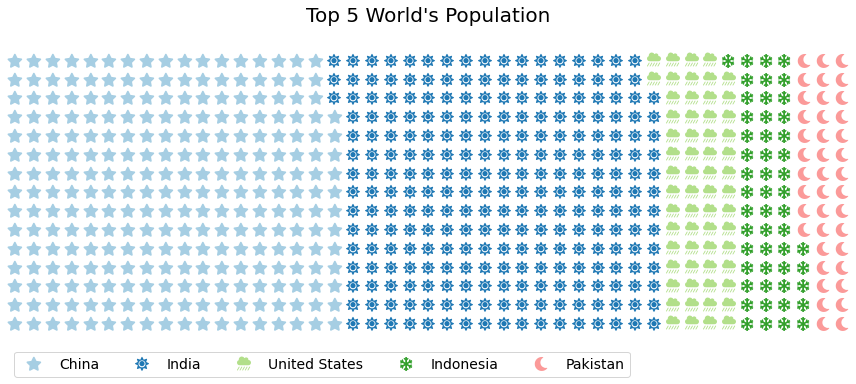

In [24]:
# Membuat waffle chart dengan bentuk icon berbeda untuk tiap kategori

fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14},
    title={'label': "Top 5 World's Population\n",
          'loc': 'center',
          'fontdict': {'fontsize': 20}},
    icons=['star', 'sun', 'cloud-showers-heavy', 'snowflake', 'moon'],
    icon_size=14,
    icon_legend=True
)

### Vertical Waffle Chart

Menampilkan <i>waffle chart</i> dalam bentuk vertikal, tambahkan parameter <code>vertical = True</code>. Perhatikan kode berikut.

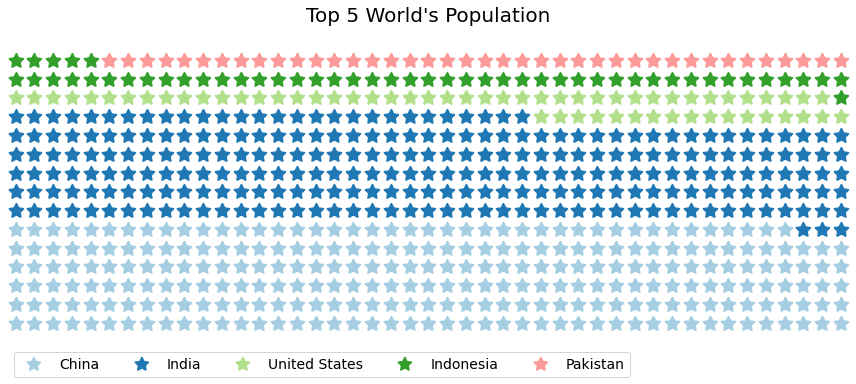

In [25]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    columns=45,
    cmap_name='Paired',
    values=tiles_per_category,
    labels=list(df_top5.index.values),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0, -0.2), 
            'loc': 'lower left', 
            'ncol': len(df_top5.index.values),
            'fontsize': 14},
    title={'label': "Top 5 World's Population\n",
          'loc': 'center',
          'fontdict': {'fontsize': 20}},
    icons='star',
    icon_size=15,
    icon_legend=True,
    vertical=True
)



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


